In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from pandas.tseries.offsets import *
import numpy as np
import scipy.stats as scs

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator


In [2]:
# Getting BBG data and cleaning
StartDate = '1995-12-30'
EndDate = (dt.datetime.today()-BDay(1)).strftime("%m/%d/%Y")

Dates = pd.DataFrame(pd.date_range(StartDate,EndDate,freq="D"),columns=['Date'])
Dates = Dates.set_index('Date',drop=True)
Dates.index.name = None

Month = pd.DataFrame(pd.date_range(StartDate,EndDate,freq="M"),columns=['Date'])
Month = Month.set_index('Date',drop=True)
Month.index.name = None

Quarter = pd.DataFrame(pd.date_range(StartDate,EndDate,freq="Q"),columns=['Date'])
Quarter = Quarter.set_index('Date',drop=True)
Quarter.index.name = None

In [3]:
# Take EPI data from excel

# Read EPI
UKEPIEx = pd.ExcelFile(r'\\capricorn\AusFI\FXNEW\FX Model v clean THIS ONE\Regime Scorecard\QuantMacroRegime\MacroRegEPI.xlsx').parse('MacroRegEPI')
UKEPIEx.index = UKEPIEx['Date']
UKEPIEx = UKEPIEx.drop(columns = ['Date'])
UKEPIEx = UKEPIEx.fillna(method='ffill')
UKEPIEx = Dates.merge(UKEPIEx,right_index=True,left_index=True,how='left')
UKEPIEx = UKEPIEx.fillna(method='ffill')
UKEPIEx = Month.merge(UKEPIEx,right_index=True,left_index=True,how='left')

In [4]:
UKEPIEx.tail()

EpiM_Headline_AU  EpiM_Business_AU  EpiM_Consumer_AU  \
2019-08-31         -1.201616         -0.810514         -1.547828   
2019-09-30         -1.122207         -0.709136         -0.904735   
2019-10-31         -1.152160         -0.680101         -0.742778   
2019-11-30         -1.093602         -0.386141         -0.380259   
2019-12-31         -0.955334         -0.722078         -0.376885   

            EpiM_Employment_AU  EpiM_Growth_AU  EpiM_Inflation_AU  \
2019-08-31           -0.238016       -1.173196          -0.109109   
2019-09-30           -0.289336       -1.264090          -0.267672   
2019-10-31           -0.422667       -1.250853          -0.378492   
2019-11-30           -0.878802       -1.183764          -0.398445   
2019-12-31           -0.134679       -1.090942          -0.406488   

            EpiM_Headline_NZ  EpiM_Business_NZ  EpiM_Consumer_NZ  \
2019-08-31          0.130303         -1.020304         -0.354152   
2019-09-30         -0.030897         -1.206799         -0.276482   
2019-10-31         -0.095115         -1.216050         -0.208466   
2019-11-30          0.181349         -0.630998          0.170338   
2019-12-31          0.663546         -0.369224          0.546356   

            EpiM_Employment_NZ  ...  EpiM_Consumer_UK  EpiM_Employment_UK  \
2019-08-31            1.438950  ...          0.072789            0.177752   
2019-09-30            1.428814  ...          0.009009            0.166787   
2019-10-31            1.398130  ...          0.066458            0.229262   
2019-11-30            1.078143  ...         -0.075605            0.062089   
2019-12-31            1.072784  ...         -0.109736            0.071851   

            EpiM_Growth_UK  EpiM_Inflation_UK  EpiM_Headline_Global  \
2019-08-31       -0.536816          -0.801183             -0.469911   
2019-09-30       -0.535227          -0.380680             -0.325728   
2019-10-31       -0.531307          -0.945866             -0.447875   
2019-11-30       -0.077558          -1.271533             -0.525725   
2019-12-31        0.009556          -0.794296             -0.520160   

            EpiM_Business_Global  EpiM_Consumer_Global  \
2019-08-31             -0.711712             -0.442848   
2019-09-30             -0.614337             -0.283837   
2019-10-31             -0.703352             -0.306907   
2019-11-30             -0.716446             -0.368442   
2019-12-31             -1.026876             -0.476515   

            EpiM_Employment_Global  EpiM_Growth_Global  EpiM_Inflation_Global  
2019-08-31                0.199673           -0.326406              -0.337889  
2019-09-30                0.404698           -0.305914              -0.347894  
2019-10-31                0.302243           -0.377753              -0.475776  
2019-11-30                0.171067           -0.458164              -0.393423  
2019-12-31                0.304541           -0.554854               0.096949  

[5 rows x 42 columns]

In [5]:
# Take Bloomberg data from excel

# Read Bloomberg Data
Ecodata = pd.ExcelFile('\\capricorn\AusFI\ANGUS\Working\MacroRegime\MacroRegBBGUpdate.xlsx').parse('Month')
Ecodata = Ecodata.iloc[2:]
Ecodata.index = Ecodata['NAME']
Ecodata = Ecodata.drop(columns = ['NAME'])
Ecodata = Ecodata.fillna(method='ffill')
Ecodata = Dates.merge(Ecodata,right_index=True,left_index=True,how='left')
Ecodata = Ecodata.fillna(method='ffill')
Ecodata = Month.merge(Ecodata,right_index=True,left_index=True,how='left')


# Read in half-yearly bak NIMs
BankData1 = pd.ExcelFile('\\capricorn\AusFI\ANGUS\Working\MacroRegime\MacroRegBBGUpdate.xlsx').parse('Quarter')
BankData1 = BankData1.iloc[1:]
BankData1.index = BankData1['Unnamed: 0']
BankData1 = BankData1.drop(columns = ['Unnamed: 0'])
BankData1 = BankData1.fillna(method='ffill')
BankData1 = Dates.merge(BankData1,right_index=True,left_index=True,how='left')
BankData1 = BankData1.fillna(method='ffill')
BankData1 = Month.merge(BankData1,right_index=True,left_index=True,how='left')
Ecodata = Ecodata.merge(BankData1,right_index=True,left_index=True,how='left')

#Read in quarterly Bank NIMs
BankData2 = pd.ExcelFile('\\capricorn\AusFI\ANGUS\Working\MacroRegime\MacroRegBBGUpdate.xlsx').parse('BiAnn')
BankData2 = BankData2.iloc[1:]
BankData2.index = BankData2['Unnamed: 0']
BankData2 = BankData2.drop(columns = ['Unnamed: 0'])
BankData2 = BankData2.fillna(method='ffill')
BankData2 = Dates.merge(BankData2,right_index=True,left_index=True,how='left')
BankData2 = BankData2.fillna(method='ffill')
BankData2 = Month.merge(BankData2,right_index=True,left_index=True,how='left')
Ecodata = Ecodata.merge(BankData2,right_index=True,left_index=True,how='left')

In [6]:
# Put the codes in UP TO HERE

NamesIdx = ['EPI ex inflation M','EPI ex inflation L','EPI Synchronised Sectors or Regions M','EPI Synchronised Sectors or Regions L',
'Earnings Growth M','Earnings Growth L','Investment/Capex M','Investment/Capex L','Credit Growth M',
'Credit Growth L','Inventory Cycle M',
'Inventory Cycle L','Global Trade M','Global Trade L','Fiscal Impulse M','Fiscal Impulse L',
'EPI Inflation M','EPI Inflation L','Wage Inflation M','Wage Inflation L','Core (Persistence/Breadth) M',
'Core (Persistence/Breadth) L','OECD Output Gap M','OECD Output Gap L','Employment EPI M',
'Employment EPI L','Unemployment level vs NAIRU M','Unemployment level vs NAIRU L',
'Capacity Utilisation M','Capacity Utilisation L','Property (1y momentum) M','Property (level) L',
'Equities M','Equities L','Household Leverage M','Household Leverage L','Corporate Leverage M',
'Corporate Leverage L','Government Leverage M','Government Leverage L',
'Public Sector Liquidity ==> Reserves, Central Bank BS M','Public Sector Liquidity ==> Reserves, Central Bank BS L',
'Private Sector Liquidity ==> Banking System Liquidity (Broader monetary aggregates, Shadow bank liquidity) M',
'Private Sector Liquidity ==> Banking System Liquidity (Broader monetary aggregates, Shadow bank liquidity) L',
'Cross Border Liquidity ==> CA Surpluses, Petrodollar flows, EM flows etc M',
'Cross Border Liquidity ==> CA Surpluses, Petrodollar flows, EM flows etc L',
'Real Policy Rate vs real neutral rate M','Real Policy Rate vs real neutral rate L','Real Long End Yields M',
'Real Long End Yield L','Real Ccy vs ToT M','Real Ccy vs ToT L','Financial Sector Health M',
'Financial Sector Health L','Credit Spreads M','Credit Spreads L']

CodesIdx = ['UKX Index','UKIPIYOY Index','UKGVNPQY Index','UKIPDURY Index','UKIPINVY Index','C12 TCAA Index',
'B14 B3UL Index','MTEF2C Index','UKTBTTBA Index','UKTBTTEX Index','UKTBTTIM Index','EHBBGB Index','UKGENMRP Index',
'UKAWXTOY Index','UKLBYBUS Index','LNTNUKYY Index','UKHCA9IQ Index','CPEXUKYY Index','UKEFUREP Index','OEEOGBUG Index',
'IOG%GBR Index','UKUEILOR Index','EUUCUK Index','UKNBAAYY Index','UKVSUK Index','UKX Index','UKLSCNC Index',
'UKLSCNCB Index','CPNFGBHG Index','CPNFGBA3 Index','UKGBQWND Index','CPNFGBNG Index','CPNFGBOG Index','FARBCRED Index',
'EBBSTOTA Index','EURUSD Curncy','BJACTOTL Index','JPYUSD Curncy','CNBMTTAS Index','CNYUSD Curncy','A23 VWYT Index',
'A23 VWYW Index','1121136 Index','USCABAL Index','ECOCEAS Index','ECOCJPN Index','ECOCCNN Index','UKBRBASE Index',
'G0022 5Y5Y BLC2 Curncy','UKRPYOY Index','USNRUK Index','USNRUS Index','USNREUAR Index','GUKG10 Index','UKGGBE10 Index',
'UKHCA9IQ Index','112.028 Index','CTOTGBP Index','HSBA LN Equity','LLOY LN Equity','BARC LN Equity','STAN LN Equity',
'LC84OAS Index',]



In [7]:
CodesNamesIdx = ['FTSE 100 INDEX','UK Industrial Production YoY S','UK GDP Chained Gross Fixed Cap',
'UK Industrial Production Durab','UK Industrial Production Inves','BOE Facilities Granted Total t',
'BOE MFI Excl CBBS Amt OS of Fr','CBI MTE Full Volume of Stocks','UK Trade Balance Value of Trad',
'UK Trade Balance Value of Trad','UK Trade Balance Value of Trad','UK Budget Balance (% GDP)',
'UK GDP Current Market Prices G','UK AWE Regular Pay Whole Econo','UK Labor Force Survey Total We',
'Eurostat Labor Costs Nominal V','UK CPI Ex Energy Food Alcohol','Eurostat UK Core HICP YoY NSA',
'UK OBR Forecast Output Gap  %','OECD Eco Outlook UK Output Gap','IMF United Kingdom Output Gap',
'UK Unemployment ILO Unemployme','European Commission Capacity U','UK Nationwide House Price All',
'United Kingdom Land Registry S','FTSE 100 INDEX','Corporate Lending Availability','Corporate Lending Loan Covenan',
'BIS United Kingdom Credit to H','United Kingdom Total Credit to','UK Household NPI Serving House',
'BIS United Kingdom Credit to N','BIS United Kingdom Credit to G','US Factors Supplying Reserve F',
'ECB Balance Sheet All Assets','EUR-USD X-RATE','Bank of Japan assets:Total','JPY-USD X-RATE',
'China Central Bank Balance She','CNY-USD X-RATE','BOE Total M1 Amounts Outstandi','BOE Total M2 Amounts Outstandi',
'IMF UK Central Bank Monetary B','US Nominal Account Balance In','Eurozone Current Account Balan',
'Japan Current Account Balance','China Current Account Balance','UK Bank of England Official Ba',
'GBP I22 FORWARD RATE 5Y5Y','UK RPI YoY NSA','Laubach Williams Natural Rate','Laubach Williams Natural Rate',
'Laubach Williams Natural Rate','UK Govt Bonds 10 Year Note Gen','UK Breakeven 10 Year',
'UK CPI Ex Energy Food Alcohol','IMF UK Real Effective Exchange','Citi Terms of Trade Index - Un',
'HSBC HOLDINGS PLC','LLOYDS BANKING GROUP PLC','BARCLAYS PLC','STANDARD CHARTERED PLC',
'Bloomberg Barclays Sterling Ag']

In [9]:
#Copies and Adjustments

#Main Code df
RegCode = pd.DataFrame(0,index=Month.index, columns=NamesIdx)
PXLast = pd.DataFrame(0,index=Month.index, columns=NamesIdx)

for i in Ecodata.columns:
    PXLast = PXLast.merge(Ecodata[i],right_index=True,left_index=True,how='left')


#Add in EPI
PXLast['EpiM_Headline_UK'] = UKEPIEx['EpiM_Headline_UK'].copy()
PXLast['EpiM_Business_UK'] = UKEPIEx['EpiM_Business_UK'].copy()
PXLast['EpiM_Consumer_UK'] = UKEPIEx['EpiM_Consumer_UK'].copy()
PXLast['EpiM_Employment_UK'] = UKEPIEx['EpiM_Employment_UK'].copy()
PXLast['EpiM_Growth_UK'] = UKEPIEx['EpiM_Growth_UK'].copy()
PXLast['EpiM_Inflation_UK'] = UKEPIEx['EpiM_Inflation_UK'].copy()



In [10]:
# Start adjusting data series

#YOY%
PXLast['C12 TCAA Index'] = (PXLast['C12 TCAA Index']/PXLast['C12 TCAA Index'].shift(12) -1)
PXLast['B14 B3UL Index'] = (PXLast['B14 B3UL Index']/PXLast['B14 B3UL Index'].shift(12) -1) #both credit growth, may need avg
PXLast['UKTBTTEX Index'] = (PXLast['UKTBTTEX Index']/PXLast['UKTBTTEX Index'].shift(12) -1)
PXLast['UKTBTTIM Index'] = (PXLast['UKTBTTIM Index']/PXLast['UKTBTTIM Index'].shift(12) -1)
PXLast['UKGENMRP Index'] = (PXLast['UKGENMRP Index']/PXLast['UKGENMRP Index'].shift(12) -1)

# Unemployment vs NAIRU estimate of 4.5% for UK (OBR website)
PXLast['UKUEILOR Index'] = (PXLast['UKUEILOR Index'] - 4.5)

# Inverse for unemployment, fiscal and debt, credit spreads
PXLast['UKUEILOR Index'] = -1*PXLast['UKUEILOR Index']
PXLast['EHBBGB Index'] = -1*PXLast['EHBBGB Index']
PXLast['CPNFGBHG Index'] = -1*PXLast['CPNFGBHG Index']
PXLast['CPNFGBNG Index'] = -1*PXLast['CPNFGBNG Index']
PXLast['CPNFGBOG Index'] = -1*PXLast['CPNFGBOG Index']
PXLast['LC84OAS Index'] = -1*PXLast['LC84OAS Index']

# 12M SUm for inventories (quarterly), trade balance
PXLast['UKGECAFU Index'] = -1*PXLast['UKGECAFU Index'].rolling(4).sum()
PXLast['UKTBTTBA Index'] = PXLast['UKTBTTBA Index'].rolling(12).sum()

# Household debt as % of income - not used outside AU
#PXLast['CPNFGBA3 Index'] = (PXLast['CPNFGBA3 Index']/(PXLast['UKGBQWND Index']/1000)) #HH income adj for blns

# Central Bank Balance sheet, convert all CB B/S to USD and Sum
PXLast['FARBCRED Index'] = ((PXLast['FARBCRED Index']/1000)+(PXLast['EBBSTOTA Index']*PXLast['EURUSD Curncy'])
                            +(PXLast['BJACTOTL Index']*PXLast['JPYUSD Curncy'])
                            +(PXLast['CNBMTTAS Index']*PXLast['CNYUSD Curncy']))                            
                            
# Current Account Balance G4 Sums
PXLast['USCABAL Index'] = PXLast['USCABAL Index']+PXLast['ECOCEAS Index']+PXLast['ECOCJPN Index']+PXLast['ECOCCNN Index']

# Real Rate Calcs policy and long end, and vs neutral rate for policy
PXLast['GUKG10 Index'] = -(PXLast['UKGGBE10 Index'] - PXLast['GUKG10 Index']) #Real long end
PXLast['UKBRBASE Index'] = -1*((PXLast['UKBRBASE Index'] - (PXLast['G0022 5Y5Y BLC2 Curncy']+PXLast['UKRPYOY Index'])/2)
                        -(0.33*PXLast['USNRUS Index']+0.33*PXLast['USNREUAR Index']+0.33*PXLast['USNRUK Index'])) #Real policy rate

# Real currency v Terms of trade
PXLast['112.028 Index'] = PXLast['CTOTGBP Index']/PXLast['112.028 Index']



In [11]:
# Z-scoring at different time frames

# 0.5Y
PXLast05Yzs = (PXLast - PXLast.rolling(6).mean())/PXLast.rolling(6).std()

#1y
PXLast1Yzs = (PXLast - PXLast.rolling(12).mean())/PXLast.rolling(12).std()

#3Y
PXLast3Yzs = (PXLast - PXLast.rolling(3*12).mean())/PXLast.rolling(3*12).std()

#5y
PXLast5Yzs = (PXLast - PXLast.rolling(5*12).mean())/PXLast.rolling(5*12).std()

#7Y
PXLast7Yzs = (PXLast - PXLast.rolling(7*12).mean())/PXLast.rolling(7*12).std()

#10Y
PXLast10Yzs = (PXLast - PXLast.rolling(10*12).mean())/PXLast.rolling(10*12).std()


In [13]:
# Add in Adjusted Series
#Growth
RegCode['EPI ex inflation M'] = PXLast05Yzs['EpiM_Headline_UK']
RegCode['EPI ex inflation L'] = PXLast5Yzs['EpiM_Headline_UK']
RegCode['EPI Synchronised Sectors or Regions M'] = (PXLast05Yzs['EpiM_Business_UK']+PXLast05Yzs['EpiM_Consumer_UK']+
                                                    PXLast05Yzs['EpiM_Employment_UK']+PXLast05Yzs['EpiM_Growth_UK']+
                                                    PXLast05Yzs['EpiM_Inflation_UK'])/5
RegCode['EPI Synchronised Sectors or Regions L'] = (PXLast5Yzs['EpiM_Business_UK']+PXLast5Yzs['EpiM_Consumer_UK']+
                                                    PXLast5Yzs['EpiM_Employment_UK']+PXLast5Yzs['EpiM_Growth_UK']+
                                                    PXLast5Yzs['EpiM_Inflation_UK'])/5
RegCode['Earnings Growth M'] = PXLast05Yzs['UKX Index BEPS']
RegCode['Earnings Growth L'] = PXLast7Yzs['UKX Index BEPS']
RegCode['Investment/Capex M'] = (PXLast5Yzs['UKIPIYOY Index']+PXLast5Yzs['UKGVNPQY Index']+PXLast5Yzs['UKIPDURY Index']+PXLast5Yzs['UKIPINVY Index'])/4
RegCode['Investment/Capex L'] = (PXLast10Yzs['UKIPIYOY Index']+PXLast10Yzs['UKGVNPQY Index']+PXLast10Yzs['UKIPDURY Index']+PXLast10Yzs['UKIPINVY Index'])/4
RegCode['Credit Growth M'] = (PXLast1Yzs['C12 TCAA Index']+PXLast1Yzs['B14 B3UL Index'])/2
RegCode['Credit Growth L'] = (PXLast7Yzs['C12 TCAA Index']+PXLast7Yzs['B14 B3UL Index'])/2
RegCode['Inventory Cycle M'] = PXLast1Yzs['UKGECAFU Index']
RegCode['Inventory Cycle L'] = PXLast7Yzs['UKGECAFU Index']
RegCode['Global Trade M'] = (PXLast1Yzs['UKTBTTBA Index']+PXLast1Yzs['UKTBTTEX Indexx']+PXLast1Yzs['UKTBTTIM Index'])/3
RegCode['Global Trade L'] = (PXLast7Yzs['UKTBTTBA Index']+PXLast7Yzs['UKTBTTEX Index']+PXLast7Yzs['UKTBTTIM Index'])/3
RegCode['Fiscal Impulse M'] = (PXLast5Yzs['EHBBGB Index']+PXLast5Yzs['UKGENMRP Index'])/2
RegCode['Fiscal Impulse L'] = (PXLast10Yzs['EHBBGB Index']+PXLast10Yzs['UKGENMRP Index'])/2




In [15]:
#Output Gap inflation
RegCode['EPI Inflation M'] = PXLast05Yzs['EpiM_Inflation_UK']
RegCode['EPI Inflation L'] = PXLast5Yzs['EpiM_Inflation_UK']
RegCode['Wage Inflation M'] = PXLast05Yzs['UKAWXTOY Index']
RegCode['Wage Inflation L'] = PXLast7Yzs['UKAWXTOY Index']
RegCode['Core (Persistence/Breadth) M'] = PXLast05Yzs['UKHCA9IQ Index']
RegCode['Core (Persistence/Breadth) L'] = PXLast7Yzs['UKHCA9IQ Index']
RegCode['OECD Output Gap M'] = PXLast5Yzs['OEEOGBUG Index']
RegCode['OECD Output Gap L'] = PXLast10Yzs['OEEOGBUG Index']
RegCode['Employment EPI M'] = PXLast5Yzs['EpiM_Employment_UK']
RegCode['Employment EPI L'] = PXLast10Yzs['EpiM_Employment_UK']
RegCode['Unemployment level vs NAIRU M'] = PXLast5Yzs['UKUEILOR Index']
RegCode['Unemployment level vs NAIRU L'] = PXLast10Yzs['UKUEILOR Index']
RegCode['Capacity Utilisation M'] = PXLast5Yzs['EUUCUK Index']
RegCode['Capacity Utilisation L'] = PXLast10Yzs['EUUCUK Index']



In [16]:
#### Financial Conditions ###
# Capacity to borrow
RegCode['Property (1y momentum) M'] = PXLast1Yzs['UKNBAAYY Index']
RegCode['Property (level) L'] = PXLast7Yzs['UKNBAAYY Index']
RegCode['Equities M'] = PXLast05Yzs['UKX Index PE']
RegCode['Equities L'] = PXLast7Yzs['UKX Index PE']
RegCode['Household Leverage M'] = PXLast5Yzs['CPNFGBHG Index']
RegCode['Household Leverage L'] = PXLast10Yzs['CPNFGBHG Index']
RegCode['Corporate Leverage M'] = PXLast5Yzs['CPNFGBNG Index']
RegCode['Corporate Leverage L'] = PXLast10Yzs['CPNFGBNG Index']
RegCode['Government Leverage M'] = PXLast5Yzs['CPNFGBOG Index']
RegCode['Government Leverage L'] = PXLast10Yzs['CPNFGBOG Index']

# Liquidity
RegCode['Public Sector Liquidity ==> Reserves, Central Bank BS M'] = PXLast05Yzs['FARBCRED Index']
RegCode['Public Sector Liquidity ==> Reserves, Central Bank BS L'] = PXLast3Yzs['FARBCRED Index']
RegCode['Private Sector Liquidity ==> Banking System Liquidity (Broader monetary aggregates, Shadow bank liquidity) M'] = (PXLast1Yzs['A23 VWYT Index']+PXLast1Yzs['A23 VWYW Index']+PXLast1Yzs['1121136 Index'])/3
RegCode['Private Sector Liquidity ==> Banking System Liquidity (Broader monetary aggregates, Shadow bank liquidity) L'] = (PXLast7Yzs['A23 VWYT Index']+PXLast7Yzs['A23 VWYW Index']+PXLast7Yzs['1121136 Index'])/3
RegCode['Cross Border Liquidity ==> CA Surpluses, Petrodollar flows, EM flows etc M'] = PXLast5Yzs['USCABAL Index']
RegCode['Cross Border Liquidity ==> CA Surpluses, Petrodollar flows, EM flows etc L'] = PXLast10Yzs['USCABAL Index']

# Funding Costs
RegCode['Real Policy Rate vs real neutral rate M'] = PXLast05Yzs['UKBRBASE Index']
RegCode['Real Policy Rate vs real neutral rate L'] = PXLast5Yzs['UKBRBASE Index']
RegCode['Real Long End Yields M'] = PXLast05Yzs['GUKG10 Index']
RegCode['Real Long End Yield L'] = PXLast5Yzs['GUKG10 Index']
RegCode['Real Ccy vs ToT M'] = PXLast1Yzs['112.028 Index']
RegCode['Real Ccy vs ToT L'] = PXLast7Yzs['112.028 Index']
RegCode['Financial Sector Health M'] = (PXLast1Yzs['HSBA LN Equity']+PXLast1Yzs['LLOY LN Equity']+PXLast1Yzs['BARC LN Equity']+PXLast1Yzs['STAN LN Equity'])/4
RegCode['Financial Sector Health L'] = (PXLast7Yzs['HSBA LN Equity']+PXLast7Yzs['LLOY LN Equity']+PXLast7Yzs['BARC LN Equity']+PXLast7Yzs['STAN LN Equity'])/4
RegCode['Credit Spreads M'] = PXLast05Yzs['LC84OAS Index']
RegCode['Credit Spreads L'] = PXLast3Yzs['LC84OAS Index']


In [17]:
# Frame conditioning logic

ConditionFrame = pd.DataFrame(RegCode.copy())
for i in (ConditionFrame.columns):
    for j in (ConditionFrame.index):
        if (ConditionFrame.loc[j,i] < -1):
            ConditionFrame.loc[j,i] = 0
        elif (ConditionFrame.loc[j,i] > 1):
            ConditionFrame.loc[j,i] = 2
        else:
            ConditionFrame.loc[j,i] = 1
            

ConditionFrame.tail()

EPI ex inflation M  EPI ex inflation L  \
2019-08-31                 1.0                 0.0   
2019-09-30                 2.0                 1.0   
2019-10-31                 1.0                 0.0   
2019-11-30                 2.0                 1.0   
2019-12-31                 2.0                 1.0   

            EPI Synchronised Sectors or Regions M  \
2019-08-31                                    1.0   
2019-09-30                                    1.0   
2019-10-31                                    1.0   
2019-11-30                                    1.0   
2019-12-31                                    1.0   

            EPI Synchronised Sectors or Regions L  Earnings Growth M  \
2019-08-31                                    1.0                1.0   
2019-09-30                                    1.0                1.0   
2019-10-31                                    1.0                1.0   
2019-11-30                                    1.0                0.0   
2019-12-31                                    1.0                0.0   

            Earnings Growth L  Investment/Capex M  Investment/Capex L  \
2019-08-31                2.0                 1.0                 1.0   
2019-09-30                2.0                 1.0                 1.0   
2019-10-31                2.0                 1.0                 1.0   
2019-11-30                2.0                 1.0                 1.0   
2019-12-31                1.0                 1.0                 1.0   

            Credit Growth M  Credit Growth L  ...  \
2019-08-31              0.0              0.0  ...   
2019-09-30              0.0              0.0  ...   
2019-10-31              0.0              0.0  ...   
2019-11-30              0.0              0.0  ...   
2019-12-31              0.0              0.0  ...   

            Real Policy Rate vs real neutral rate M  \
2019-08-31                                      1.0   
2019-09-30                                      1.0   
2019-10-31                                      2.0   
2019-11-30                                      2.0   
2019-12-31                                      2.0   

            Real Policy Rate vs real neutral rate L  Real Long End Yields M  \
2019-08-31                                      1.0                     2.0   
2019-09-30                                      2.0                     1.0   
2019-10-31                                      2.0                     1.0   
2019-11-30                                      2.0                     1.0   
2019-12-31                                      2.0                     0.0   

            Real Long End Yield L  Real Ccy vs ToT M  Real Ccy vs ToT L  \
2019-08-31                    2.0                0.0                1.0   
2019-09-30                    2.0                0.0                1.0   
2019-10-31                    2.0                0.0                1.0   
2019-11-30                    2.0                1.0                1.0   
2019-12-31                    2.0                1.0                1.0   

            Financial Sector Health M  Financial Sector Health L  \
2019-08-31                        1.0                        1.0   
2019-09-30                        1.0                        1.0   
2019-10-31                        1.0                        1.0   
2019-11-30                        1.0                        1.0   
2019-12-31                        1.0                        1.0   

            Credit Spreads M  Credit Spreads L  
2019-08-31               1.0               1.0  
2019-09-30               1.0               1.0  
2019-10-31               1.0               1.0  
2019-11-30               1.0               1.0  
2019-12-31               1.0               1.0  

[5 rows x 56 columns]

In [18]:
# Create Growth Momentum Regime Percentages
RegCols = ['Reflation','Mid Cycle','Late Cycle','Downturn','Recession']
GrowthMPerc = pd.DataFrame(0,index=RegCode.index,columns=RegCols)

GrowthMCols = ['EPI ex inflation M','EPI Synchronised Sectors or Regions M','Earnings Growth M',
              'Investment/Capex M','Credit Growth M','Inventory Cycle M','Global Trade M','Fiscal Impulse M']

for i in GrowthMCols:
    for j in ConditionFrame.index:
        if ConditionFrame.loc[j,i] == 2:
            GrowthMPerc.loc[j,'Reflation'] += 1
            GrowthMPerc.loc[j,'Mid Cycle'] += 1
        elif ConditionFrame.loc[j,i] == 1:
            GrowthMPerc.loc[j,'Late Cycle'] += 1
        elif ConditionFrame.loc[j,i] == 0:
            GrowthMPerc.loc[j,'Downturn'] += 1
            GrowthMPerc.loc[j,'Recession'] += 1

# Growth Momentum Frame Percentages            
GrowthMPerc = GrowthMPerc/len(GrowthMCols)

GrowthMPerc.tail()

Reflation  Mid Cycle  Late Cycle  Downturn  Recession
2019-08-31      0.125      0.125       0.750     0.125      0.125
2019-09-30      0.250      0.250       0.625     0.125      0.125
2019-10-31      0.125      0.125       0.750     0.125      0.125
2019-11-30      0.250      0.250       0.500     0.250      0.250
2019-12-31      0.250      0.250       0.500     0.250      0.250

In [19]:
# Create Growth Level Regime Percentages
RegCols = ['Reflation','Mid Cycle','Late Cycle','Downturn','Recession']
GrowthLPerc = pd.DataFrame(0,index=RegCode.index,columns=RegCols)

GrowthLCols = ['EPI ex inflation L','EPI Synchronised Sectors or Regions L','Earnings Growth L',
              'Investment/Capex L','Credit Growth L','Inventory Cycle L','Global Trade L','Fiscal Impulse L']

for i in GrowthLCols:
    for j in ConditionFrame.index:
        if ConditionFrame.loc[j,i] == 2:
            GrowthLPerc.loc[j,'Downturn'] += 1
            GrowthLPerc.loc[j,'Late Cycle'] += 1
        elif ConditionFrame.loc[j,i] == 1:
            GrowthLPerc.loc[j,'Mid Cycle'] += 1
        elif ConditionFrame.loc[j,i] == 0:
            GrowthLPerc.loc[j,'Recession'] += 1
            GrowthLPerc.loc[j,'Reflation'] += 1

# Growth Momentum Frame Percentages            
GrowthLPerc = GrowthLPerc/len(GrowthLCols)


GrowthLPerc.tail()

Reflation  Mid Cycle  Late Cycle  Downturn  Recession
2019-08-31      0.250      0.625       0.125     0.125      0.250
2019-09-30      0.125      0.625       0.250     0.250      0.125
2019-10-31      0.250      0.625       0.125     0.125      0.250
2019-11-30      0.125      0.750       0.125     0.125      0.125
2019-12-31      0.125      0.750       0.125     0.125      0.125

In [20]:
# Create Inflation Momentum Regime Percentages
RegCols = ['Reflation','Mid Cycle','Late Cycle','Downturn','Recession']
InflationMPerc = pd.DataFrame(0,index=RegCode.index,columns=RegCols)

InflationMCols = ['EPI Inflation M','Wage Inflation M','Core (Persistence/Breadth) M','OECD Output Gap M',
              'Employment EPI M','Unemployment level vs NAIRU M','Capacity Utilisation M']

for i in InflationMCols:
    for j in ConditionFrame.index:
        if ConditionFrame.loc[j,i] == 2:
            InflationMPerc.loc[j,'Mid Cycle'] += 1
            InflationMPerc.loc[j,'Late Cycle'] += 1
        elif ConditionFrame.loc[j,i] == 1:
            InflationMPerc.loc[j,'Downturn'] += 1
        elif ConditionFrame.loc[j,i] == 0:
            InflationMPerc.loc[j,'Recession'] += 1
            
            

# Growth Momentum Frame Percentages            
InflationMPerc = InflationMPerc/len(InflationMCols)


InflationMPerc.tail()

Reflation  Mid Cycle  Late Cycle  Downturn  Recession
2019-08-31        0.0   0.428571    0.428571  0.571429   0.000000
2019-09-30        0.0   0.285714    0.285714  0.571429   0.142857
2019-10-31        0.0   0.142857    0.142857  0.714286   0.142857
2019-11-30        0.0   0.285714    0.285714  0.571429   0.142857
2019-12-31        0.0   0.142857    0.142857  0.571429   0.285714

In [21]:
# Create Inflation Level Regime Percentages
RegCols = ['Reflation','Mid Cycle','Late Cycle','Downturn','Recession']
InflationLPerc = pd.DataFrame(0,index=RegCode.index,columns=RegCols)

InflationLCols = ['EPI Inflation L','Wage Inflation L','Core (Persistence/Breadth) L','OECD Output Gap L',
              'Employment EPI L','Unemployment level vs NAIRU L','Capacity Utilisation L']

for i in InflationLCols:
    for j in ConditionFrame.index:
        if ConditionFrame.loc[j,i] == 2:
            InflationLPerc.loc[j,'Late Cycle'] += 1
        elif ConditionFrame.loc[j,i] == 1:
            InflationLPerc.loc[j,'Mid Cycle'] += 1
        elif ConditionFrame.loc[j,i] == 0:
            InflationLPerc.loc[j,'Recession'] += 1
            InflationLPerc.loc[j,'Reflation'] += 1
            

# Growth Momentum Frame Percentages            
InflationLPerc = InflationLPerc/len(InflationLCols)


InflationLPerc.tail()

Reflation  Mid Cycle  Late Cycle  Downturn  Recession
2019-08-31   0.142857   0.428571    0.428571       0.0   0.142857
2019-09-30   0.142857   0.571429    0.285714       0.0   0.142857
2019-10-31   0.142857   0.571429    0.285714       0.0   0.142857
2019-11-30   0.142857   0.571429    0.285714       0.0   0.142857
2019-12-31   0.285714   0.571429    0.142857       0.0   0.285714

In [22]:
# Create Financial Conditions Momentum Regime Percentages
RegCols = ['Reflation','Mid Cycle','Late Cycle','Downturn','Recession']
FinCondMPerc = pd.DataFrame(0,index=RegCode.index,columns=RegCols)

FinCondMCols = ['Property (1y momentum) M','Equities M','Household Leverage M','Corporate Leverage M',
               'Government Leverage M','Public Sector Liquidity ==> Reserves, Central Bank BS M',
               'Private Sector Liquidity ==> Banking System Liquidity (Broader monetary aggregates, Shadow bank liquidity) M',
               'Cross Border Liquidity ==> CA Surpluses, Petrodollar flows, EM flows etc M',
               'Real Policy Rate vs real neutral rate M','Real Long End Yields M','Real Ccy vs ToT M',
               'Financial Sector Health M','Credit Spreads M']

for i in FinCondMCols:
    for j in ConditionFrame.index:
        if ConditionFrame.loc[j,i] == 2:
            FinCondMPerc.loc[j,'Reflation'] += 1
        elif ConditionFrame.loc[j,i] == 1:
            FinCondMPerc.loc[j,'Mid Cycle'] += 1
            FinCondMPerc.loc[j,'Downturn'] += 1
        elif ConditionFrame.loc[j,i] == 0:
            FinCondMPerc.loc[j,'Late Cycle'] += 1
            

# Growth Momentum Frame Percentages            
FinCondMPerc = FinCondMPerc/len(FinCondMCols)


FinCondMPerc.tail()

Reflation  Mid Cycle  Late Cycle  Downturn  Recession
2019-08-31   0.153846   0.692308    0.153846  0.692308        0.0
2019-09-30   0.076923   0.769231    0.153846  0.769231        0.0
2019-10-31   0.153846   0.769231    0.076923  0.769231        0.0
2019-11-30   0.230769   0.769231    0.000000  0.769231        0.0
2019-12-31   0.230769   0.692308    0.076923  0.692308        0.0

In [23]:
# Create Financial Conditions Level Regime Percentages
RegCols = ['Reflation','Mid Cycle','Late Cycle','Downturn','Recession']
FinCondLPerc = pd.DataFrame(0,index=RegCode.index,columns=RegCols)

FinCondLCols = ['Property (level) L','Equities L','Household Leverage L','Corporate Leverage L',
               'Government Leverage L','Public Sector Liquidity ==> Reserves, Central Bank BS L',
               'Private Sector Liquidity ==> Banking System Liquidity (Broader monetary aggregates, Shadow bank liquidity) L',
               'Cross Border Liquidity ==> CA Surpluses, Petrodollar flows, EM flows etc L',
               'Real Policy Rate vs real neutral rate L','Real Long End Yields M','Real Ccy vs ToT L',
               'Financial Sector Health L','Credit Spreads L']

for i in FinCondLCols:
    for j in ConditionFrame.index:
        if ConditionFrame.loc[j,i] == 2:
            FinCondLPerc.loc[j,'Reflation'] += 1
            FinCondLPerc.loc[j,'Mid Cycle'] += 1
        elif ConditionFrame.loc[j,i] == 1:
            FinCondLPerc.loc[j,'Late Cycle'] += 1
        elif ConditionFrame.loc[j,i] == 0:
            FinCondLPerc.loc[j,'Recession'] += 1
            

# Growth Momentum Frame Percentages            
FinCondLPerc = FinCondLPerc/len(FinCondLCols)


FinCondLPerc.head()

Reflation  Mid Cycle  Late Cycle  Downturn  Recession
1995-12-31        0.0        0.0         1.0       0.0        0.0
1996-01-31        0.0        0.0         1.0       0.0        0.0
1996-02-29        0.0        0.0         1.0       0.0        0.0
1996-03-31        0.0        0.0         1.0       0.0        0.0
1996-04-30        0.0        0.0         1.0       0.0        0.0

In [24]:
# Generate overall probabilities
# Loop makes 0s into 0.0001s to avoid totally nullifying regime outcomes

GrowthProb = GrowthMPerc*GrowthLPerc
for i in GrowthProb.columns:
    for j in GrowthProb.index:
        if GrowthProb.loc[j,i] < 0.01:
            GrowthProb.loc[j,i] = 0.0001
InflationProb = InflationMPerc*InflationLPerc
for i in InflationProb.columns:
    for j in InflationProb.index:
        if InflationProb.loc[j,i] < 0.01:
            InflationProb.loc[j,i] = 0.0001
FinCondProb = FinCondMPerc*FinCondLPerc
for i in FinCondProb.columns:
    for j in FinCondProb.index:
        if FinCondProb.loc[j,i] < 0.01:
            FinCondProb.loc[j,i] = 0.0001

# Adjust for blank regimes
InflationProb['Downturn'] = InflationMPerc['Downturn']*InflationMPerc['Downturn']
InflationProb['Reflation'] = InflationLPerc['Reflation']*InflationLPerc['Reflation']
FinCondProb['Downturn'] = FinCondMPerc['Downturn']*FinCondMPerc['Downturn']
FinCondProb['Recession'] = FinCondLPerc['Recession']*FinCondLPerc['Recession']

GrowthProb.tail()

Reflation  Mid Cycle  Late Cycle  Downturn  Recession
2019-08-31    0.03125   0.078125     0.09375  0.015625   0.031250
2019-09-30    0.03125   0.156250     0.15625  0.031250   0.015625
2019-10-31    0.03125   0.078125     0.09375  0.015625   0.031250
2019-11-30    0.03125   0.187500     0.06250  0.031250   0.031250
2019-12-31    0.03125   0.187500     0.06250  0.031250   0.031250

In [25]:
InflationProb.tail()

Reflation  Mid Cycle  Late Cycle  Downturn  Recession
2019-08-31   0.020408   0.183673    0.183673  0.326531   0.000100
2019-09-30   0.020408   0.163265    0.081633  0.326531   0.020408
2019-10-31   0.020408   0.081633    0.040816  0.510204   0.020408
2019-11-30   0.020408   0.163265    0.081633  0.326531   0.020408
2019-12-31   0.081633   0.081633    0.020408  0.326531   0.081633

In [26]:
FinCondProb.tail()

Reflation  Mid Cycle  Late Cycle  Downturn  Recession
2019-08-31   0.023669   0.106509    0.118343  0.479290   0.005917
2019-09-30   0.017751   0.177515    0.106509  0.591716   0.005917
2019-10-31   0.035503   0.177515    0.053254  0.591716   0.005917
2019-11-30   0.053254   0.177515    0.000100  0.591716   0.005917
2019-12-31   0.053254   0.159763    0.047337  0.479290   0.023669

In [28]:
# Calculate the total probabilities

#TotalProb = GrowthProb*((InflationProb+FinCondProb)/2) #higher dominance to Growth
TotalProb = GrowthProb*InflationProb*FinCondProb

TotalProb[RegCols] = TotalProb[RegCols].div(TotalProb[RegCols].sum(axis=1), axis=0).multiply(100)

TotalProb.tail()

GrowthProb.to_excel('\\capricorn\AusFI\ANGUS\Working\MacroRegime\AustraliaQuantReg\AusRegGrowthProbability.xlsx')
InflationProb.to_excel('\\capricorn\AusFI\ANGUS\Working\MacroRegime\AustraliaQuantReg\AusRegInflationProbability.xlsx')
FinCondProb.to_excel('\\capricorn\AusFI\ANGUS\Working\MacroRegime\AustraliaQuantReg\AusRegFinancialCondProbability.xlsx')
TotalProb.to_excel('\\capricorn\AusFI\ANGUS\Working\MacroRegime\AustraliaQuantReg\AusRegTotalProbability.xlsx')
ConditionFrame.to_excel('\\capricorn\AusFI\ANGUS\Working\MacroRegime\AustraliaQuantReg\AusRegimeFullScoring.xlsx')

Text(0.5,1,'Australia Regime Probabilities')

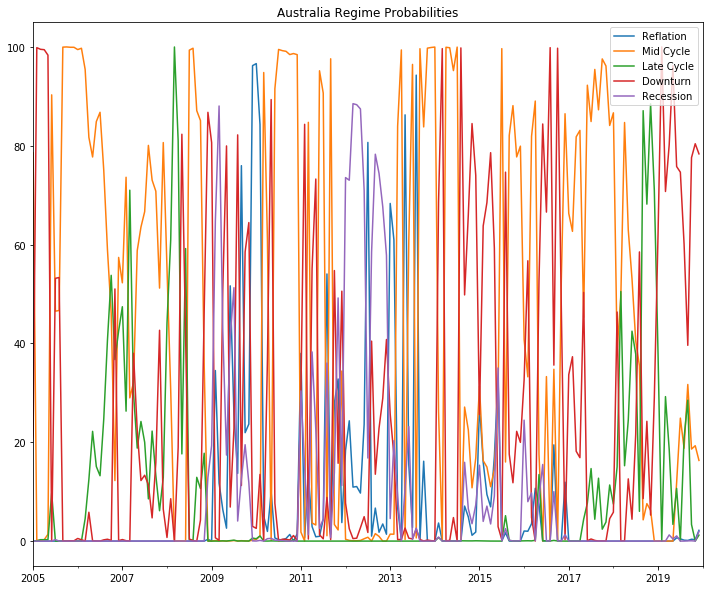

In [25]:
% matplotlib  inline


TotalProb.plot(figsize=(12,10))
plt.axis(['2005-01-01',EndDate,-5,105])
plt.title('United Kingdom Regime Probabilities')